In [733]:
import pandas as pd
import re
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind

In [734]:
all_files = ["bedTimeHours.csv", "dayCaffeine.csv", "gender.csv", "minsAwake.csv", 
"minutesNap.csv", "nightCaffeine.csv", "section.csv", "SSI.csv", 
"toSleepMinutes.csv", "useAlarm.csv", "wakeHours.csv"]
section_number = 218

Parse the files

In [735]:
for file_name in all_files:
    variable_name = re.search("(.+?).csv$", file_name).group(1)
    sample_df = pd
    
    # create the dataframes
    globals()[variable_name] = pd.DataFrame(pd.read_csv(file_name, header=None))

    # Overall medians
    globals()[f"{variable_name}_median"] = globals()[variable_name].median(skipna=True).T


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == '__main__':


In [736]:
hoursInBed = wakeHours-bedTimeHours
hours_napping = minutesNap / 60
hours_to_sleep = toSleepMinutes / 60
hours_awake = minsAwake / 60
total_daily_sleep_median = ((wakeHours-bedTimeHours) + hours_napping - hours_to_sleep - hours_awake).median(skipna=True).T


concatenate median table

In [737]:
median_table = pd.concat([wakeHours_median, bedTimeHours_median, hoursInBed.median(skipna=True).T, 
toSleepMinutes_median, minutesNap_median, minsAwake_median, total_daily_sleep_median, SSI_median], axis = 1)


reset index

In [738]:
median_table.index = median_table.index + 1

arrange table

In [739]:
median_table = median_table.T
my_info = median_table[218]
median_table = median_table.drop(columns=[218])
median_table.insert(loc=0, column=218, value=my_info)
median_table.index = ["wakeHours", "bedTimeHours", "hoursInBed", 
"toSleepMinutes", "minutesNap", "minsAwake", "total_daily_sleep", "SSI"]
print(median_table)

                        218       1          2          3          4    \
wakeHours          7.000000  6.500000   5.683300   6.500000   9.000000   
bedTimeHours      -0.116670 -0.500000  -2.616700   0.333330   0.666670   
hoursInBed         7.283330  7.166700   7.433300   5.833330   8.000000   
toSleepMinutes     5.000000  0.000000  17.000000  30.000000  10.000000   
minutesNap         0.000000  0.000000   0.000000   0.000000   0.000000   
minsAwake          0.000000  4.000000  10.000000   0.000000  70.000000   
total_daily_sleep  7.166667  7.083367   7.049967   5.333333   6.583333   
SSI                2.000000  2.000000   2.000000   3.000000   2.000000   

                        5          6    7          8        9    ...  \
wakeHours          7.566700   8.433300  7.5   8.500000  5.75000  ...   
bedTimeHours      -0.833330   0.083333 -0.5   2.000000 -1.48330  ...   
hoursInBed         8.466600   8.599970  8.0   7.500000  7.91670  ...   
toSleepMinutes     8.000000   5.000000  0.0  

Statistics for individuals (bedTimeHours & hoursInBed)

In [740]:
average_bed_time_hours = bedTimeHours.mean(skipna=True)
average_hours_in_bed = hoursInBed.mean(skipna=True)

average_pair = pd.concat([average_bed_time_hours, average_hours_in_bed, section], axis=1)
average_pair.index += 1
average_pair = average_pair.T
average_pair.index = ["average_bed_time_hours", "average_hours_in_bed", "section"]
average_pair = average_pair.T
print(average_pair)

     average_bed_time_hours  average_hours_in_bed  section
1                 -0.682538              7.158743      0.0
2                 -2.034125              7.478563      3.0
3                  0.769843              5.607143      3.0
4                  0.583334              8.065100      4.0
5                 -0.886503              8.461903      7.0
..                      ...                   ...      ...
339                1.711110              6.312700      6.0
340                1.111112              7.280969      5.0
341               -0.869048              6.745238      7.0
342                0.742858              9.727047      5.0
343               -1.380950              7.786498      3.0

[343 rows x 3 columns]


Scatter plot

In [741]:
# average_pair.plot.scatter(x="average_bed_time_hours", y="average_hours_in_bed")

Adding multiple data labels

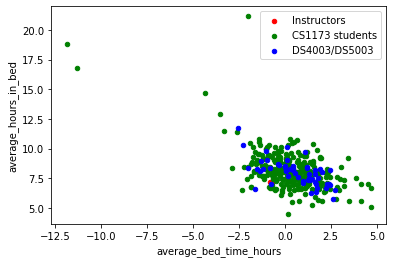

In [742]:
instructors = average_pair[average_pair['section'] == 0]
section1 = average_pair.query("(section > 0) and (section < 6) or (section == 7)", inplace=False)
section2 = average_pair[average_pair['section'] == 6]

ax = instructors.plot(x="average_bed_time_hours", y="average_hours_in_bed", kind='scatter', c='r', label='Instructors')
section1.plot(x="average_bed_time_hours", y="average_hours_in_bed", kind='scatter', ax=ax, c='g', label='CS1173 students')
section2.plot(x="average_bed_time_hours", y="average_hours_in_bed", kind='scatter', ax=ax, c='b', label='DS4003/DS5003')
plt.show()

Correlation
For each section

In [743]:
instructor_correlation = instructors.iloc[:, :2].corr()
CS1173_students_correlation = section1.iloc[:, :2].corr()
DS4003_DS5003_students_correlation = section2.iloc[:, :2].corr()

For overall

In [744]:
overall_pair = pd.concat([bedTimeHours.mean(axis=0), hoursInBed.mean(axis=0)], axis=1)
overall_pair.index += 1
overall_pair = overall_pair.T
overall_pair.index += 1
overall_pair.index = ["average_bed_time_hours", "average_hours_in_bed"]

overall_correlation = overall_pair.T.corr()
print(overall_correlation)

                        average_bed_time_hours  average_hours_in_bed
average_bed_time_hours                1.000000             -0.591091
average_hours_in_bed                 -0.591091              1.000000


Boxplot of average daily sleep by gender

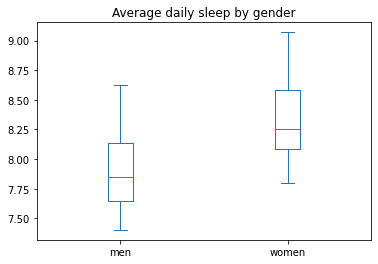

In [745]:
hoursInBed.index += 1
hoursInBed = hoursInBed.T
hoursInBed.index += 1
hoursInBed = hoursInBed.T

gender.columns = gender.iloc[0]
gender = gender[1:]
gender.reset_index(drop=True, inplace=True)

gender.index += 1
men = hoursInBed[gender.gender[gender.gender == "male"].index.tolist()]
women = hoursInBed[gender.gender[gender.gender == "female"].index.tolist()]

men_average = men.mean(axis=1)
women_average = women.mean(axis=1)

hours_in_bed_average = pd.concat([men_average, women_average], axis=1)
hours_in_bed_average.columns = ["men", "women"]

fig, ax = plt.subplots()
hours_in_bed_average.plot(ax=ax, kind="box", title="Average daily sleep by gender")

plt.show()

Differences in sleep patterns
ttest_function

In [746]:
def average_ttest(test_data, test_group, groups):
    test_data.index += 1
    test_data = test_data.T
    test_data.index += 1
    test_data = test_data.T

    test_group.reset_index(drop=True, inplace=True)
    test_group.index += 1
    
    globals()[groups[0]] = test_data[test_group.gender[test_group.gender == groups[0]].index.tolist()]
    globals()[groups[1]] = test_data[test_group.gender[test_group.gender == groups[1]].index.tolist()]

    globals()[f"{groups[0]}_mean"] = globals()[groups[0]].mean(axis=1)
    globals()[f"{groups[1]}_mean"] = globals()[groups[1]].mean(axis=1)

    combined_mean = pd.concat([globals()[f"{groups[0]}_mean"], globals()[f"{groups[1]}_mean"]], axis=1)
    combined_mean.columns = [groups[0], groups[1]]

    ttest_result = ttest_ind(combined_mean[groups[0]], combined_mean[groups[1]])[0]

    print(ttest_result)

print('bed time hours:', end = " ")
average_ttest(bedTimeHours, gender, ["male", "female"])
print("use alarm:", end = " ")
average_ttest(useAlarm, gender, ["male", "female"])
print("napping hours:", end = " ")
print(ttest_ind(hours_napping_average["men"], hours_napping_average["women"])[0])


bed time hours: 3.0181177619511437
use alarm: -0.5454341066799118
napping hours: -2.3247088841619568
